In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

In [5]:
fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow.nc'

ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds

<xarray.Dataset>
Dimensions:  (time: 51, x: 17569, y: 17002)
Coordinates:
  * x        (x) float64 2.54e+05 2.54e+05 2.54e+05 ... 3.067e+05 3.067e+05
  * y        (y) float64 4.23e+06 4.23e+06 4.23e+06 ... 4.179e+06 4.179e+06
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (y, x) uint8 dask.array<shape=(17002, 17569), chunksize=(1000, 1000)>
Data variables:
    snow     (time, y, x) int16 dask.array<shape=(51, 17002, 17569), chunksize=(1, 1000, 1000)>
    dem      (y, x) int16 dask.array<shape=(17002, 17569), chunksize=(1000, 1000)>
    veg      (y, x) int16 dask.array<shape=(17002, 17569), chunksize=(1000, 1000)>

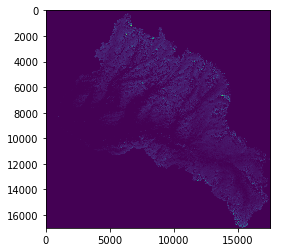

In [3]:
plt.imshow(ds.snow[49])

#### Normalized variance for flights closest to peak SWE dates

In [ ]:
# Normalized variance for flights closest to peak SWE dates
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 1). mean snow depth for each year (get 6 means for each year, 2013-2018 (compute without zeros ideally))
# means=ds.snow.mean(dim=('x', 'y')) #ds.mean(dim=('x','y')--mean over all layers)
# means

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 2). standardize lidar

def standard(x):
    a = np.where(x>0, x, np.nan)
    return x/np.nanmean(a)

s = xr.apply_ufunc(standard, ds.snow)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 3). compute normalized variance for peak SWE dates
s_var=np.nanvar(s,axis=0) #np language

In [ ]:
plt.figure()
plt.imshow(np.where(s_var>0,s_var,np.nan),cmap='jet', vmax=5)
plt.colorbar()
plt.show()